Data loaded and preprocessed successfully.


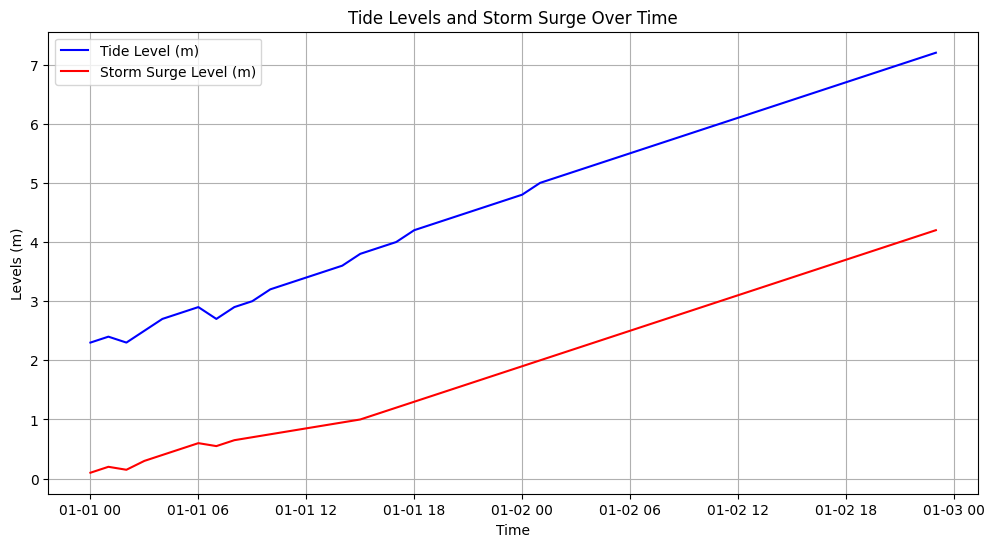

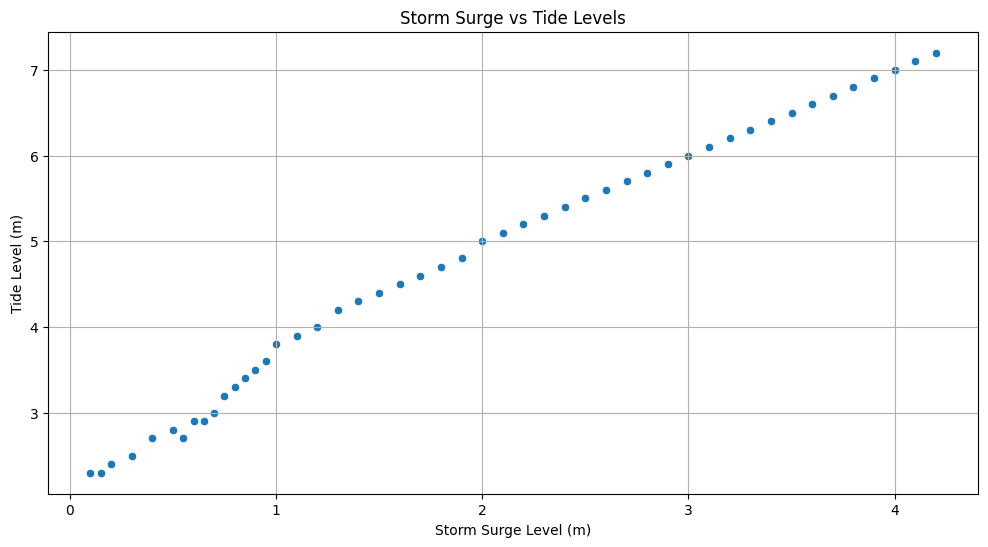

Number of significant storm surge events (threshold > 0.3m): 44
                     Storm_Surge_Level (m)  Tide_Level (m)  Wind_Speed (km/h)  \
Timestamp                                                                       
2024-01-01 04:00:00                   0.40             2.7                 30   
2024-01-01 05:00:00                   0.50             2.8                 35   
2024-01-01 06:00:00                   0.60             2.9                 40   
2024-01-01 07:00:00                   0.55             2.7                 45   
2024-01-01 08:00:00                   0.65             2.9                 50   
2024-01-01 09:00:00                   0.70             3.0                 55   
2024-01-01 10:00:00                   0.75             3.2                 60   
2024-01-01 11:00:00                   0.80             3.3                 65   
2024-01-01 12:00:00                   0.85             3.4                 70   
2024-01-01 13:00:00                   0.90   

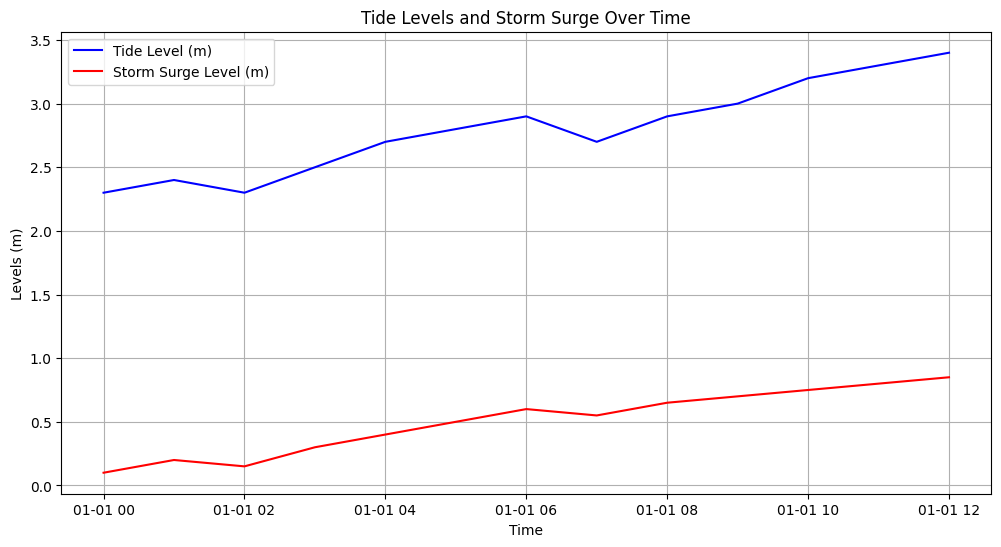

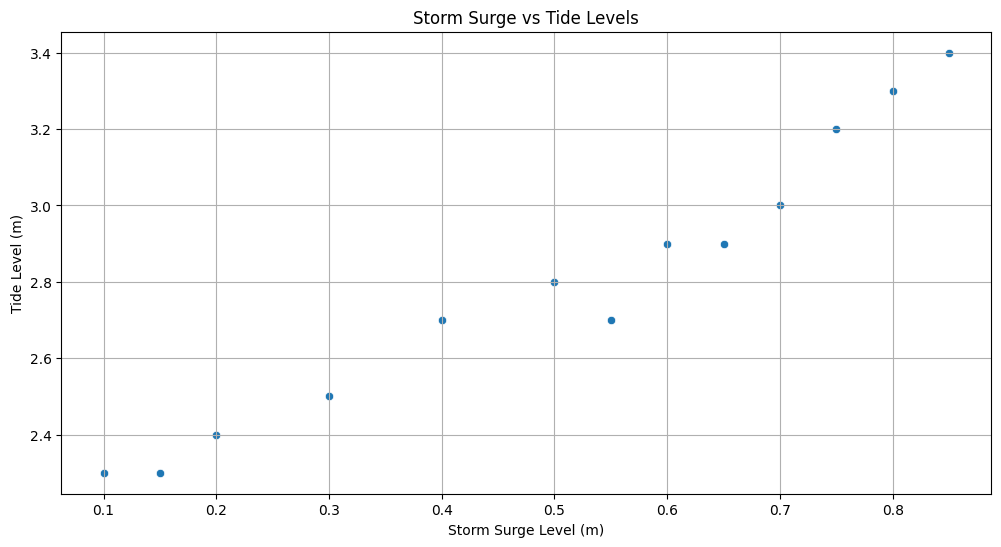

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Loading and Preprocessing
def load_and_preprocess_data(file_path):
    data = pd.read_csv(file_path)
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])  # Convert to datetime
    data.set_index('Timestamp', inplace=True)  # Set timestamp as the index
    return data

# Step 2: Data Visualization
def visualize_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Tide_Level (m)'], label='Tide Level (m)', color='blue')
    plt.plot(data.index, data['Storm_Surge_Level (m)'], label='Storm Surge Level (m)', color='red')
    plt.title('Tide Levels and Storm Surge Over Time')
    plt.xlabel('Time')
    plt.ylabel('Levels (m)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Comparison Chart
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=data['Storm_Surge_Level (m)'], y=data['Tide_Level (m)'])
    plt.title('Storm Surge vs Tide Levels')
    plt.xlabel('Storm Surge Level (m)')
    plt.ylabel('Tide Level (m)')
    plt.grid(True)
    plt.show()

# Step 3: Trend Analysis
def trend_analysis(data, threshold=0.5):
    significant_surge = data[data['Storm_Surge_Level (m)'] > threshold]
    print(f"Number of significant storm surge events (threshold > {threshold}m): {len(significant_surge)}")
    print(significant_surge)

# Step 4: Basic Statistical Analysis
def statistical_analysis(data):
    print("\nBasic Statistics:")
    print(data.describe())
    correlation = data['Storm_Surge_Level (m)'].corr(data['Tide_Level (m)'])
    print(f"\nCorrelation between Storm Surge and Tide Levels: {correlation:.2f}")

# Step 5: User Interaction - Filter by Time Range
def filter_by_time_range(data, start_time, end_time):
    filtered_data = data.loc[start_time:end_time]
    return filtered_data

# Main Program
if __name__ == "__main__":
    file_path = 'mn.csv'

    # Step 1: Load and preprocess data
    data = load_and_preprocess_data(file_path)
    print("Data loaded and preprocessed successfully.")

    # Step 2: Visualize data
    visualize_data(data)

    # Step 3: Analyze trends
    trend_analysis(data, threshold=0.3)

    # Step 4: Perform statistical analysis
    statistical_analysis(data)

    # Step 5: Allow user to filter by time range
    start_time = "2024-01-01 00:00"
    end_time = "2024-01-01 12:00"
    filtered_data = filter_by_time_range(data, start_time, end_time)
    print(f"\nFiltered Data ({start_time} to {end_time}):")
    print(filtered_data)

    # Visualize filtered data
    visualize_data(filtered_data)
